In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting the max columns to none
pd.set_option('display.max_columns', None)

# Importing Data 

In [3]:
# Defining path
path = r'/Users/richardniyongabo/Desktop/Tasks_4.6_richard'

In [4]:
# Importing merged dataframe
ords_prods_all = pd.read_pickle(os.path.join(path, 'full_mergedd.pkl'))

In [5]:
# Checking shape of imported dataframe
ords_prods_all.shape

(32434212, 36)

# 2. Checking for Security Concerns

In [6]:
# Checking the output for PII
ords_prods_all.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_duration,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2,33120,1,1,3355525,202279,prior,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
1,104690,33120,2,1,3355530,202279,prior,8,6,10,30.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
2,132412,33120,1,1,3355528,202279,prior,6,5,9,30.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
3,2808715,33120,1,1,3355527,202279,prior,5,5,13,9.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
4,2894949,33120,5,0,3355523,202279,prior,1,5,9,NaN,True,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119


# First Name and Last Name are attributes that need confidentiality, therefore a need for excluding them from analysis. In addition, they don't serve much purpose in the analysis 

In [7]:
# Dropping columns containing PII data
df_instacart = ords_prods_all.drop(columns = ['first_name', 'last_name'])

In [8]:
# Viewing new dataframe
df_instacart

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_duration,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2,33120,1,1,3355525,202279,prior,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
1,104690,33120,2,1,3355530,202279,prior,8,6,10,30.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
2,132412,33120,1,1,3355528,202279,prior,6,5,9,30.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
3,2808715,33120,1,1,3355527,202279,prior,5,5,13,9.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
4,2894949,33120,5,0,3355523,202279,prior,1,5,9,NaN,True,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,2771559,44573,1,1,377522,22711,prior,2,1,13,0.0,False,Peppermint Bark,45,19,6.7,both,Mid-range product,Regularly busy,Busiest days,Most orders,3,New customer,6.700000,Low spender,3.5,Frequent customer,Female,Iowa,32,4/28/2017,2,married,39229
32434208,276317,47210,1,1,1101648,66343,prior,3,6,15,19.0,False,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32434209,484769,47210,1,0,1101646,66343,prior,1,6,11,NaN,True,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32434210,1561557,47210,1,1,1101647,66343,prior,2,1,11,30.0,False,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


# 3a. Region Varaiable

In [9]:
# Viewing state counts in dataframe
df_instacart['state'].value_counts(dropna = False)

Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
Nevada                  636697
New York                636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mississi

In [10]:
# Creating list of region labels
region = []

for value in df_instacart['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [11]:
# Checking region output
region

['West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',


In [12]:
# Adding region column to dataframe
df_instacart['region'] = region

In [13]:
# Checking region value counts
df_instacart['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

# 3b. Regional Spending Habbits

In [14]:
# Creating crosstab for US regional spending
region_spending_crosstab = pd.crosstab(df_instacart['region'], df_instacart['spender_flag'], dropna = False)

In [15]:
# Viewing crosstab
region_spending_crosstab

spender_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


In [16]:
# Finding percentages of high spenders per US region
Midwest_high_spenders = (155975 / (155975+7441350)) * 100
Northeast_high_spenders = (108225 / (108225+5614511)) * 100
South_high_spenders = (209691 / (209691+10582194)) * 100
West_high_spenders = (160354 / (160354+8132559)) * 100

In [17]:
Midwest_high_spenders, Northeast_high_spenders, South_high_spenders, West_high_spenders

(2.053025242437305, 1.8911408808653762, 1.9430433144904713, 1.9336269414619447)

# Spending is homogeneous across all regions with a slight percentage difference 

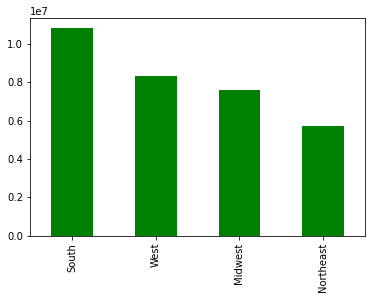

In [18]:
# Creating region bar chart 
region_bar = df_instacart['region'].value_counts().plot.bar(color =['green'])

In [19]:
# Saving bar chart as image
region_bar.figure.savefig(os.path.join(path, 'region_bar.png'))

# 4. Low activity customer exclusion flag 

In [20]:
# Creating low activity flag
df_instacart.loc[df_instacart['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [21]:
# Creating normal activity flag
df_instacart.loc[df_instacart['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [22]:
# Checking the count of activity flag
df_instacart['activity_flag'].value_counts(dropna = False)

Normal activity    30992664
Low activity        1441548
Name: activity_flag, dtype: int64

In [23]:
# Creating low activity subset
df_low_activity = df_instacart[df_instacart['activity_flag']=='Low activity']

In [24]:
# Checking low activity shape
df_low_activity.shape

(1441548, 36)

In [25]:
# Creating normal activity subset
df_normal_activity = df_instacart[df_instacart['activity_flag']=='Normal activity']

In [26]:
# Checking normal activity shape
df_normal_activity.shape

(30992664, 36)

In [27]:
# Exporting low activity subset
df_low_activity.to_pickle(os.path.join(path,'low_activity_customers.pkl'))

# 5. Profiling Customers

# Age 

In [28]:
# Viewing Age values
df_normal_activity['age'].value_counts().sort_index()

18    478832
19    496633
20    480628
21    489549
22    491342
       ...  
77    478489
78    471482
79    508845
80    493147
81    486268
Name: age, Length: 64, dtype: int64

In [29]:
# Creating 'age' profile
age_profile = []

for value in df_normal_activity['age']:
    if (value >= 18) and (value <= 24):
        age_profile.append('Young Adult')
    elif (value >= 25) and (value <= 64):
        age_profile.append('Adult')
    elif (value >= 65):
        age_profile.append('Senior')

In [30]:
# Assigning age profile to column
df_normal_activity['age_profile'] = age_profile

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_3066/2997100281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['age_profile'] = age_profile


In [31]:
# Viewing age_profile values
df_normal_activity['age_profile'].value_counts().sort_index()

Adult          19371602
Senior          8202746
Young Adult     3418316
Name: age_profile, dtype: int64

# Income 

In [32]:
# Viewing Income values
df_normal_activity['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 96070, dtype: int64

In [34]:
# Creating 'income' profile
income_profile = []

for value in df_normal_activity['income']:
    if (value < 52200): 
        income_profile.append('Lower income')
    elif (value >= 52200) & (value < 156600):
        income_profile.append('Middle income')
    else:
        income_profile.append('Upper income')

In [35]:
# Assigning income profile to column
df_normal_activity['income_profile'] = income_profile

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_3066/198291466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['income_profile'] = income_profile


In [36]:
# Viewing income_profile values
df_normal_activity['income_profile'].value_counts().sort_index()

Lower income      3695708
Middle income    24563078
Upper income      2733878
Name: income_profile, dtype: int64

# Goods 

In [37]:
# Creating 'goods' profile

goods_profile = []

for value in df_normal_activity['department_id']:
    if value == 1:
        goods_profile.append('Frozen')
    elif value == 2:
        goods_profile.append('Other')
    elif value == 3:
        goods_profile.append('Bakery')
    elif value == 4:
        goods_profile.append('Produce')
    elif value == 5:
        goods_profile.append('Alcohol')
    elif value == 6:
        goods_profile.append('International')
    elif value == 7:
        goods_profile.append('Beverages')
    elif value == 8:
        goods_profile.append('Pets')
    elif value == 9:
        goods_profile.append('Dry goods pasta')
    elif value == 10:
        goods_profile.append('Bulk')
    elif value == 11:
        goods_profile.append('Personal care')
    elif value == 12:
        goods_profile.append('Meat seafood')
    elif value == 13:
        goods_profile.append('Pantry')
    elif value == 14:
        goods_profile.append('Breakfast')
    elif value == 15:
        goods_profile.append('Canned goods')
    elif value == 16:
        goods_profile.append('Dairy eggs')
    elif value == 17:
        goods_profile.append('Household')
    elif value == 18:
        goods_profile.append('Babies')
    elif value == 19:
        goods_profile.append('Snacks')
    elif value == 20:
        goods_profile.append('Deli')
    elif value == 21:
        goods_profile.append('Missing')

In [38]:
# Assigning goods profile to column
df_normal_activity['goods_profile'] = goods_profile

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_3066/3342882724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['goods_profile'] = goods_profile


In [39]:
# Viewing goods profile values
df_normal_activity['goods_profile'].value_counts().sort_index()

Alcohol             144674
Babies              410392
Bakery             1125026
Beverages          2571934
Breakfast           678095
Bulk                 33451
Canned goods       1012074
Dairy eggs         5191828
Deli               1003834
Dry goods pasta     822136
Frozen             2123342
Household           699858
International       255991
Meat seafood        674785
Missing              64768
Other                34411
Pantry             1782903
Personal care       424415
Pets                 93065
Produce            9079276
Snacks             2766406
Name: goods_profile, dtype: int64

# Dependants

In [40]:
# Viewing dependents values
df_normal_activity['number_of_dependents'].value_counts().sort_index()

0    7747032
1    7725981
2    7740199
3    7779452
Name: number_of_dependents, dtype: int64

In [41]:
# Creating 'dependents' profile
dependents_profile = []

for value in df_normal_activity['number_of_dependents']:
    if (value == 0): 
        dependents_profile.append('No dependents')
    else:
        dependents_profile.append('dependents')

In [42]:
# Assigning goods profile to column
df_normal_activity['dependents_profile'] = dependents_profile

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_3066/768869998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['dependents_profile'] = dependents_profile


In [43]:
# Viewing dependents profile values
df_normal_activity['dependents_profile'].value_counts().sort_index()

No dependents     7747032
dependents       23245632
Name: dependents_profile, dtype: int64

# Creating customer profile variable 

In [44]:
# Creating customer profiles
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Young Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Young Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Young Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Young Adult lower income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Young Adult middle income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Young Adult upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Adult lower income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Adult middle income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Adult upper income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Senior Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Senior Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Senior Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Senior lower income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Senior middle income'  
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependents_profile'] == 'No dependents'), 'customer_profile'] = 'Senior upper income'  

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_3066/2153182717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependents_profile'] == 'dependents'), 'customer_profile'] = 'Young Parent/Guardian lower income'


In [45]:
# Viewing customer profile values
df_normal_activity['customer_profile'].value_counts().sort_index()

Adult lower income                        610057
Adult middle income                      3863639
Adult upper income                        423219
Parent/Guardian lower income             1762726
Parent/Guardian middle income           11505640
Parent/Guardian upper income             1206321
Senior Parent/Guardian lower income       562650
Senior Parent/Guardian middle income     4811863
Senior Parent/Guardian upper income       804320
Senior lower income                       169131
Senior middle income                     1582597
Senior upper income                       272185
Young Adult lower income                  149532
Young Adult middle income                 669106
Young Adult upper income                    7566
Young Parent/Guardian lower income        441612
Young Parent/Guardian middle income      2130233
Young Parent/Guardian upper income         20267
Name: customer_profile, dtype: int64

# 6.Profile Visualisation 

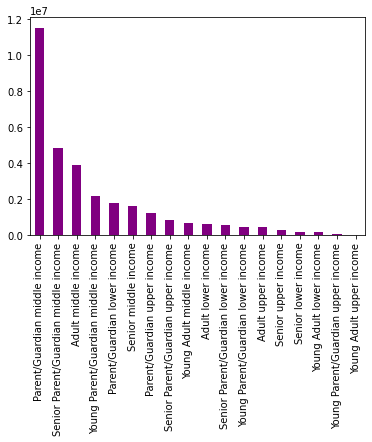

In [46]:
# Creating bar chart 
bar = df_normal_activity['customer_profile'].value_counts().plot.bar(color =['purple'])

In [47]:
# Saving stacked bar chart as image
bar.figure.savefig(os.path.join(path, 'customer_profile_bar.png'))

# 7.Customer profile aggregation 

In [48]:
# Order frequency by customer profile aggregation
df_normal_activity.groupby('customer_profile').agg({'median_order_duration': ['mean', 'min', 'max']})

median_order_duration           
                                                      mean  min   max
customer_profile                                                     
Adult lower income                               10.399400  0.0  30.0
Adult middle income                               9.884556  0.0  30.0
Adult upper income                                9.577508  0.0  30.0
Parent/Guardian lower income                     10.611665  0.0  30.0
Parent/Guardian middle income                     9.915372  0.0  30.0
Parent/Guardian upper income                      9.839103  0.0  30.0
Senior Parent/Guardian lower income              10.329158  0.0  30.0
Senior Parent/Guardian middle income              9.932646  0.0  30.0
Senior Parent/Guardian upper income               9.759156  0.0  30.0
Senior lower income                              10.580713  0.0  30.0
Senior middle income                              9.835867  0.5  30.0
Senior upper income                               9.793192  1.0  30.0
Young Adult lower income                         10.215432  0.0  30.0
Young Adult middle income                        10.125636  0.0  30.0
Young Adult upper income                          8.743061  3.0  30.0
Young Parent/Guardian lower income               10.293925  0.0  30.0
Young Parent/Guardian middle income               9.752384  0.0  30.0
Young Parent/Guardian upper income                9.403242  2.0  30.0

In [49]:
df_normal_activity.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_duration,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,activity_flag,age_profile,income_profile,goods_profile,dependents_profile,customer_profile
0,2,33120,1,1,3355525,202279,prior,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Normal activity,Adult,Middle income,Dairy eggs,dependents,Parent/Guardian middle income
1,104690,33120,2,1,3355530,202279,prior,8,6,10,30.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Normal activity,Adult,Middle income,Dairy eggs,dependents,Parent/Guardian middle income
2,132412,33120,1,1,3355528,202279,prior,6,5,9,30.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Normal activity,Adult,Middle income,Dairy eggs,dependents,Parent/Guardian middle income
3,2808715,33120,1,1,3355527,202279,prior,5,5,13,9.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Normal activity,Adult,Middle income,Dairy eggs,dependents,Parent/Guardian middle income
4,2894949,33120,5,0,3355523,202279,prior,1,5,9,NaN,True,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Average orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Normal activity,Adult,Middle income,Dairy eggs,dependents,Parent/Guardian middle income


In [50]:
# spending by customer profile aggregation
df_normal_activity.groupby('customer_profile').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                         
                                            mean        min           max
customer_profile                                                         
Adult lower income                      6.799955   1.000000     11.487500
Adult middle income                     9.599615   2.382759   5135.893590
Adult upper income                     40.207602   7.002308  15006.940000
Parent/Guardian lower income            6.786852   1.000000     12.000000
Parent/Guardian middle income           9.365699   1.522222   5271.136842
Parent/Guardian upper income           43.859252   7.000000   6983.593023
Senior Parent/Guardian lower income     6.514286   1.262500      7.968000
Senior Parent/Guardian middle income    9.244517   1.300000   2410.696774
Senior Parent/Guardian upper income    29.839305   7.001093   7414.485185
Senior lower income                     6.513746   1.800000      7.249587
Senior middle income                    9.501986   1.308333  14042.512281
Senior upper income                    30.006032   7.000575   2673.245778
Young Adult lower income                6.972669   2.100000     13.878571
Young Adult middle income              13.507360   7.000000   8794.882427
Young Adult upper income              148.622958  26.662644   2990.717910
Young Parent/Guardian lower income      7.034662   2.000000     11.783333
Young Parent/Guardian middle income    10.567986   7.000000   5668.766038
Young Parent/Guardian upper income    282.109626  25.849554  10209.987755

# 8. Customer Profiles by Regions

In [51]:
# Create customer profile/region crosstab
customer_region_profile = pd.crosstab(df_normal_activity['region'], df_normal_activity['customer_profile'], dropna = False )

In [52]:
# View age profile/region crosstab
customer_region_profile

customer_profile,Adult lower income,Adult middle income,Adult upper income,Parent/Guardian lower income,Parent/Guardian middle income,Parent/Guardian upper income,Senior Parent/Guardian lower income,Senior Parent/Guardian middle income,Senior Parent/Guardian upper income,Senior lower income,Senior middle income,Senior upper income,Young Adult lower income,Young Adult middle income,Young Adult upper income,Young Parent/Guardian lower income,Young Parent/Guardian middle income,Young Parent/Guardian upper income
region,,,,,,,,,,,,,,,,,,
Midwest,138484,932154,100583,421688,2686960,290086,128231,1125158,181609,37561,377093,55820,35419,144278,3095,103982,500893,4613
Northeast,108968,646456,70967,301923,2037798,214269,102704,867394,136937,33425,294637,51167,28019,120582,1607,74183,377710,1322
South,219709,1272363,144409,600214,3812971,393721,186243,1584651,281652,56334,510700,91250,43698,244568,1321,152313,715797,8548
West,142896,1012666,107260,438901,2967911,308245,145472,1234660,204122,41811,400167,73948,42396,159678,1543,111134,535833,5784


In [53]:
# Create marital status/region crosstab
marital_region_profile = pd.crosstab(df_normal_activity['region'], df_normal_activity['marital_status'], dropna = False )

In [54]:
# View marital status/region crosstab
marital_region_profile

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617713,351692,5091528,1206774
Northeast,479244,256783,3857457,876584
South,878028,505905,7230205,1706324
West,672776,368231,5583831,1309589


In [55]:
# Create income profile/goods crosstab
income_goods_profile = pd.crosstab(df_normal_activity['goods_profile'], df_normal_activity['income_profile'], dropna = False )

In [56]:
# View income profile/goods crosstab
income_goods_profile

income_profile,Lower income,Middle income,Upper income
goods_profile,,,
Alcohol,19349,106840,18485
Babies,34026,339345,37021
Bakery,119666,898644,106716
Beverages,413098,1936517,222319
Breakfast,100127,519771,58197
Bulk,5060,25988,2403
Canned goods,88560,829785,93729
Dairy eggs,556386,4171151,464291
Deli,116835,798206,88793


# 9. Crosstab Visualisations

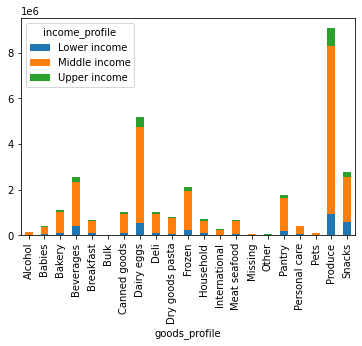

In [57]:
# Plot stacked bar chart of income/goods crosstab
income_goods_profile = income_goods_profile.plot(kind = 'bar', stacked = True)

In [58]:
# Save stacked bar chart as image
income_goods_profile.figure.savefig(os.path.join(path, 'income_goods_bar.png'))

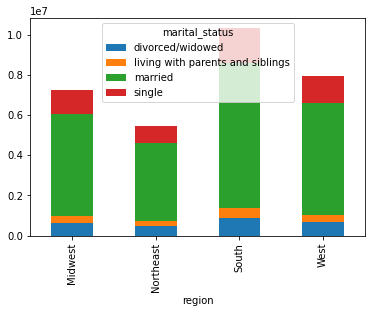

In [59]:
# Plot stacked bar chart of marital status/region crosstab
marital_region_profile = marital_region_profile.plot(kind = 'bar', stacked = True)

In [ ]:
# Create marital status/region crosstab
marital_region_profiles = pd.crosstab(df_normal_activity['age'], df_normal_activity['marital_status'], dropna = False )

In [ ]:
# Plot stacked bar chart of marital status/region crosstab
marital_region_profiles = marital_region_profiles.plot(kind = 'bar', stacked = True)

In [69]:
# Save stacked bar chart as image
marital_region_profile.figure.savefig(os.path.join(path, 'marital_region_bar.png'))

In [99]:
# Create loyalty spending crosstab
loyalty_distribution = pd.crosstab(df_instacart['loyalty_flag'], df_instacart['spender_flag'], dropna = False)

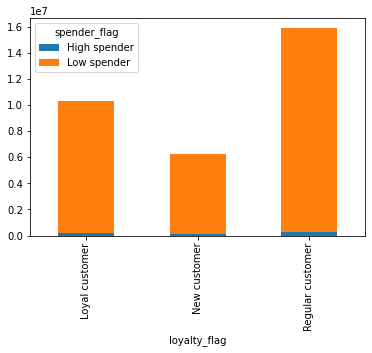

In [100]:
loyalty_distribution_stacked_bar = loyalty_distribution.plot(kind = 'bar', stacked = True)

In [72]:
# Save stacked bar chart as image
loyalty_distribution_stacked_bar.figure.savefig(os.path.join(path, 'loyalty_distribution_stacked_bar.png'))

In [73]:
# Create age family status crosstab
age_family_status = pd.crosstab(df_normal_activity['age_profile'], df_normal_activity['marital_status'], dropna = False)

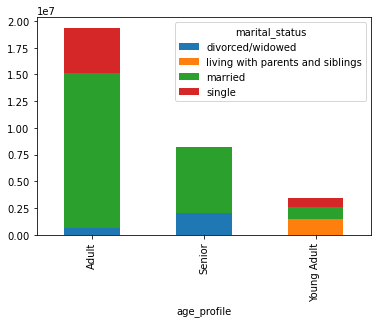

In [74]:
age_family_status_bar = age_family_status.plot(kind = 'bar', stacked = True)

In [75]:
# Save stacked bar chart as image
age_family_status_bar.figure.savefig(os.path.join(path,  'age_family_status_bar.png'))

In [76]:
# Export new dataframe
df_instacart.to_pickle(os.path.join(path,  'instacart.pkl'))

In [77]:
# Export normal activity subset
df_normal_activity.to_pickle(os.path.join(path,'normal_activity_customers.pkl'))